#Scikit-learn Cookbook
Recipes with concrete machine learning problems.  
You'll need a knowledge of pandas, matplotlib, numpy and of course, scikit-learn.

In [1]:
#<help:cookbook_setup>
%matplotlib inline

##Training with k-fold cross-validation
This recipe repeatedly trains a [logistic regression](http://en.wikipedia.org/wiki/Logistic_regression) classifier over different subsets (folds) of sample data. Attempts to match the percentage of each class in every fold to its percentage in the overall dataset ([stratification](http://en.wikipedia.org/wiki/Stratified_sampling)). Evaluates each model against a test set. Collects the confusion matrices for each test fold into a panel.

This recipe defaults to using the [Iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). To use your own data, set `X` to your instance feature vectors, `y` to the instance classes as a factor, and `labels` to the instance classes as human readable names.

In [3]:
# <help:scikit_cross_validation>
#import all the libraries needed
import warnings
warnings.filterwarnings('ignore') #notebook outputs warnings, let's ignore them
import pandas
import sklearn
import sklearn.datasets
import sklearn.metrics as metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# load the iris dataset
dataset = sklearn.datasets.load_iris()

# define feature vectors (X) and target (y)
X = dataset.data   
y = dataset.target 
labels = dataset.target_names 
labels  

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)

print(skf)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]


In [8]:
scores #Accuracy predicting the test set for each fold

[]

##Principle Component Analysis plots
This recipe performs a [PCA](http://en.wikipedia.org/wiki/Principal_component_analysis) and plots the data against the first two principal components calculated in a scatter plot. It then prints the eigenvalues and eigenvectors and finally prints the precentage of total variance explained by each component. 

This recipe defaults to using the [Iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set).   To use your own data, set `X` to your instance feature vectors, `y` to the instance classes as a factor, and `labels` to the instance classes as human readable names.

In [9]:
# <help:scikit_principle_component_analysis>
from __future__ import division
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# load the iris dataset
dataset = sklearn.datasets.load_iris()
# define feature vectors (X) and target (y)
X = dataset.data   
y = dataset.target 
labels = dataset.target_names  

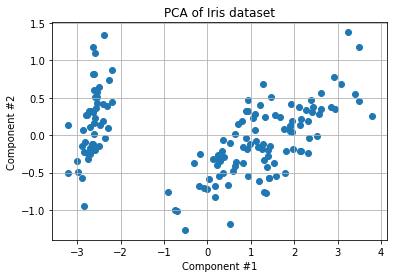

In [10]:
# <help:scikit_principle_component_analysis>
pca = PCA(n_components=2) #define how many components to perform on, recommend n_components < y_features
X_pca = pca.fit_transform(X) #transform and train to the subspace

# TODO: label the X-axis with "Component #1" and y-axis with "Component #2"
fig, ax = plt.subplots()
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.grid()
plt.title('PCA of Iris dataset')
ax.set_xlabel('Component #1') 
ax.set_ylabel('Component #2')
plt.show()

In [11]:
# <help:scikit_principle_component_analysis>
# Eigendecomposition on the covariance matrix
cov_mat = np.cov(X_pca.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 1.00000000e+00 -3.58950568e-17]
 [ 0.00000000e+00  1.00000000e+00]]

Eigenvalues 
[4.22824171 0.24267075]


In [12]:
# <help:scikit_principle_component_analysis>
# prints the magnitudes of the variances in each principal component as a percentage
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


## K-means cluster plot

This recipe performs a [K-means clustering](http://en.wikipedia.org/wiki/K-means_clustering) on _`n`_ samples of the iris dataset _`k`_ times, and plots the within cluster sum of squares error (i.e., inertia).

This recipe defaults to using the [Iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set).   To use your own data, set `X` to your instance feature vectors, `y` to the instance classes as a factor, and `labels` to the instance classes as human readable names.

k = 1, inertia= 681.370600
k = 2, inertia= 152.347952
k = 3, inertia= 78.851441
k = 4, inertia= 57.228473
k = 5, inertia= 46.472230


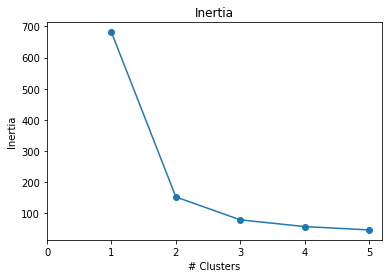

In [13]:
# <help:scikit_k-means_cluster>
from time import time
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.cluster import KMeans

#load datasets and assign data and features
dataset = sklearn.datasets.load_iris()
X = dataset.data
y = dataset.target

#number of clusters, must be >=1
k = 6
inertia = [np.NaN]

#perform a k-means cluster over n...k
for n in range(1,k):
    k_means_ = KMeans(n_clusters=int(n))
    k_means_.fit(X)
    print('k = %d, inertia= %f' % (n, k_means_.inertia_ ))
    inertia.append(k_means_.inertia_) 
#plot a line graph
ax = plt.subplot(111)
ax.plot(inertia, '-o')
plt.xticks(range(k))
plt.title("Inertia")
ax.set_ylabel('Inertia')
ax.set_xlabel('# Clusters')
plt.show()   


## Grid search for an SVM Classifier

This recipe performs a [grid search](http://en.wikipedia.org/wiki/Hyperparameter_optimization) for the best settings for a [support vector machine,](http://en.wikipedia.org/wiki/Support_vector_machine) predicting the class of each flower in the [iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). It separates the data set by training on a fraction of the data and testing on the rest. 

This recipe defaults to using the [Iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set).   To use your own data, set `X` to your instance feature vectors, `y` to the instance classes as a factor, and `labels` to the instance classes as human readable names.

In [15]:
#<help_scikit_grid_search>
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

#load datasets and features
dataset = sklearn.datasets.load_iris()
X = dataset.data
y = dataset.target
labels = dataset.target_names
# separate datasets into training and test datasets (cross-validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


In [17]:
#<help_scikit_grid_search>
#define the parameter dictionary with the kernels of SVCs
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-2],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'degree': [1, 3, 5],
                     'C': [1, 10, 100, 1000]}]
#define the scores to evaluate a parameter setting. Add more if needed. GridSearchCV loops though a dict.
scores = [ 'accuracy']
#iterate though each score setting, perform grid search
for score in scores:
    print("# Tuning hyper-parameters for: %s" % score)
    print('') 
    clf = GridSearchCV(SVC(C=1, probability= True), parameters, cv= 5, scoring=score) #5 folds
    clf.fit(X_train, y_train) #train the model 
    print("Best parameters found from SVM's:")
    print(clf.best_params_) 
    print('')   
    print("Best score found from SVM's:")    
    print(clf.best_score_)
    print('') 

# Tuning hyper-parameters for: accuracy

Best parameters found from SVM's:
{'C': 1, 'degree': 3, 'kernel': 'poly'}

Best score found from SVM's:
0.96



## Plot the ROC Curve   
This recipe plots the [reciever operating characteristic (ROC)](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) [curve](http://en.wikipedia.org/wiki/Precision_and_recall#Definition_.28classification_context.29) for a [SVC classifier](http://en.wikipedia.org/wiki/Support_vector_machine) trained over a portion of the iris dataset.  ROC requires binary values, so the targets will be [binarized](http://en.wikipedia.org/wiki/Binary_classification). 

This recipe defaults to using the [Iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set).   To use your own data, set `X` to your instance feature vectors, `y` to the instance classes as a factor, and `labels` to the instance classes as human readable names.

In [19]:
# <help:scikit_roc>
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# load iris, set and data
dataset = sklearn.datasets.load_iris()
X = dataset.data
# binarize the output for binary classification
y = label_binarize(dataset.target, classes=[0, 1, 2])
labels = dataset.target_names

# add noise to the features so the plot is less ideal
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# split data for cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

# classify instances into more than two classes, one vs rest
# add param to create probabilities to determine Y or N as the classification
clf = OneVsRestClassifier(SVC(kernel='linear', probability=True))
# fit estiamators and return the distance of each sample from the decision boundary
y_score = clf.fit(X_train, y_train).decision_function(X_test)

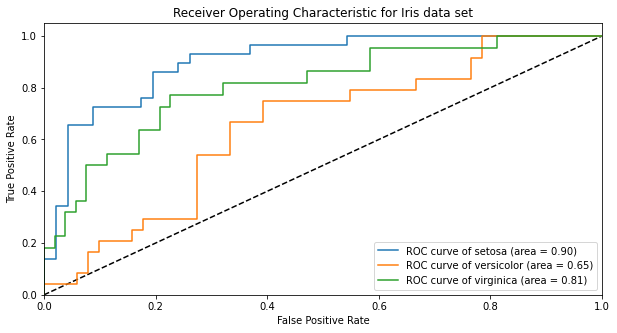

In [20]:
# <help:scikit_roc>
# plot the ROC curve, best for it to be in top left corner
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], 'k--') # add a straight line representing a random model 
for i, label in enumerate(labels):
    # false positive and true positive rate for each class
    fpr, tpr, _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
    # area under the curve (auc) for each class
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve of {0} (area = {1:0.2f})'.format(label, roc_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic for Iris data set')
plt.xlabel('False Positive Rate') # 1- specificity
plt.ylabel('True Positive Rate') # sensitivity
plt.legend(loc="lower right")
plt.show()

## Build a pipeline   
 This recipe builds a [pipeline](http://en.wikipedia.org/wiki/Pipeline_(software) that can classify a snippet of text that belongs to one of the 20 [USENET](http://en.wikipedia.org/wiki/Usenet) [newgroups](http://en.wikipedia.org/wiki/Usenet_newsgroup). It trains the pipeline on a set of examples and tests on a [holdout](http://en.wikipedia.org/wiki/Cross-validation_%28statistics%29#2-fold_cross-validation) set.

In [ ]:
# <help:scikit_pipeline>
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups


dataset = fetch_20newsgroups()

X = dataset.data
y = dataset.target
labels = dataset.target_names
labels

In [ ]:
# <help:scikit_pipeline>

#split data holding out 50% for testing the classifier
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.5, random_state=0)
#pipelines concatenate functions serially, output of 1 becomes input of 2
clf = Pipeline([('vect', HashingVectorizer(analyzer='word', ngram_range=(1,3))), #convert text to matrix
    ('tfidf', TfidfTransformer()), #transform matrix to noramlized term frequency
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                         alpha=1e-3, n_iter=5)), #estimator classifies by features
])

In [ ]:
# <help:scikit_pipeline>
#train the model, it may take a minute
y_pred = clf.fit(X_train, y_train).predict(X_test)
#metrics, see http://en.wikipedia.org/wiki/Precision_and_recall for details
print metrics.classification_report(y_test, y_pred, target_names=labels)

In [9]:
# <help:scikit_pipeline>
# print the http://en.wikipedia.org/wiki/Confusion_matrix
metrics.confusion_matrix(y_test,y_pred)

array([[201,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   3,   1,   2,   1,   1],
       [  1, 242,  10,   7,   2,   8,   2,   0,   1,   2,   3,   2,   4,
          3,   3,   0,   1,   1,   0,   1],
       [  1,   4, 271,  10,   1,  11,   1,   0,   0,   1,   1,   2,   1,
          0,   1,   1,   0,   0,   0,   0],
       [  2,   9,  22, 224,  12,   1,   9,   1,   0,   1,   3,   8,   3,
          1,   3,   0,   1,   0,   1,   1],
       [  2,   2,   4,   7, 233,   2,   6,   2,   3,   4,   0,   2,   3,
          2,   2,   1,   1,   2,   1,   0],
       [  0,   7,   9,   2,   2, 267,   4,   1,   1,   0,   3,   4,   0,
          1,   3,   0,   0,   0,   1,   0],
       [  1,   3,   0,   5,   1,   0, 263,   4,   2,   0,   2,   2,   4,
          0,   0,   3,   3,   1,   0,   1],
       [  3,   0,   1,   0,   1,   2,   6, 259,  13,   4,   3,   1,   1,
          0,   2,   0,   2,   0,   2,   0],
       [  2,   0,   0,   0,   0,   0,   8,   3, 293,   0,   2,  